<a href="https://colab.research.google.com/github/MaxKuzaj13/dw_matrix_NLP/blob/master/matrix_4_day_1_and_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pwd

/content/drive/My Drive/Colab Notebooks/matrix


In [4]:
cd '/content/drive/My Drive/Colab Notebooks/matrix'

/content/drive/My Drive/Colab Notebooks/matrix


In [0]:
#mkdir -p "four"

In [7]:
cd 'four'

/content/drive/My Drive/Colab Notebooks/matrix/four


In [0]:
#!pip install gensim --upgrade

In [0]:
#!pip install pyLDAvis

In [0]:
import gensim
import pyLDAvis

In [2]:
#Should be 3.8.0 or newer
gensim.__version__

'3.8.1'

In [16]:
pyLDAvis.__version__

'2.1.2'

In [0]:
from gensim.models import Word2Vec
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib notebook
%matplotlib inline


Data

In [0]:
sentences = []

for i in range(100000):
  start =np.random.randint(0,20)
  finish = start + np.random.randint(1,10)
  sentence = [str(x) for x in range(start, finish)]
  sentences.append(sentence)

In [62]:
pd.DataFrame(sentences)

,0,1,2,3,4,5,6,7,8
0,10,11,12,13,14,15,16,17,18
1,1,2,3,None,None,None,None,None,None
2,4,None,None,None,None,None,None,None,None
3,4,5,None,None,None,None,None,None,None
4,16,17,18,19,20,None,None,None,None
...,...,...,...,...,...,...,...,...,...
99995,13,14,15,16,17,None,None,None,None
99996,16,17,18,19,20,21,22,23,None
99997,8,9,10,11,12,13,None,None,None
99998,4,5,6,7,8,9,10,None,None


In [0]:
model = Word2Vec(sentences, size = 10, window=4, min_count=1)

In [64]:
model.wv['1']

array([-1.4180539 , -0.6945739 , -0.6108952 , -0.09028891, -1.8099586 ,
        0.7033454 ,  3.4773278 , -2.4323826 , -2.3817081 , -2.5162067 ],
      dtype=float32)

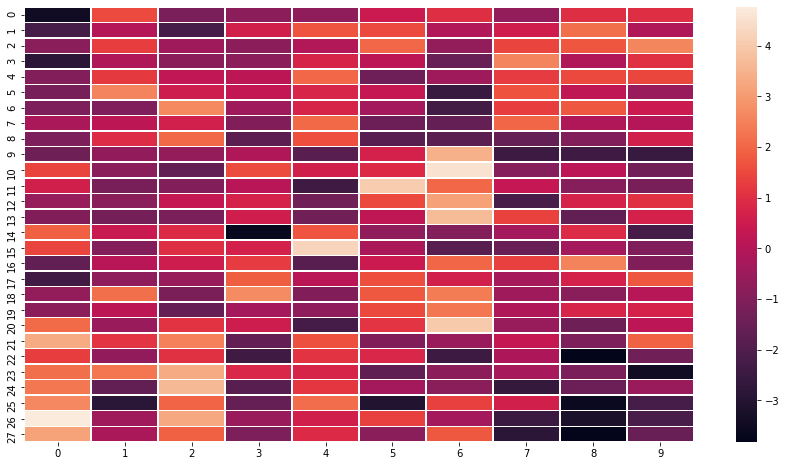

In [65]:
plt.figure(figsize=(15,8))
sns.heatmap(model.wv[model.wv.vocab], linewidths=0.5)

In [0]:
def plot_heatmap(model):
  plt.figure(figsize=(15,8))
  sns.heatmap(model.wv[model.wv.vocab], linewidths=0.5)
  

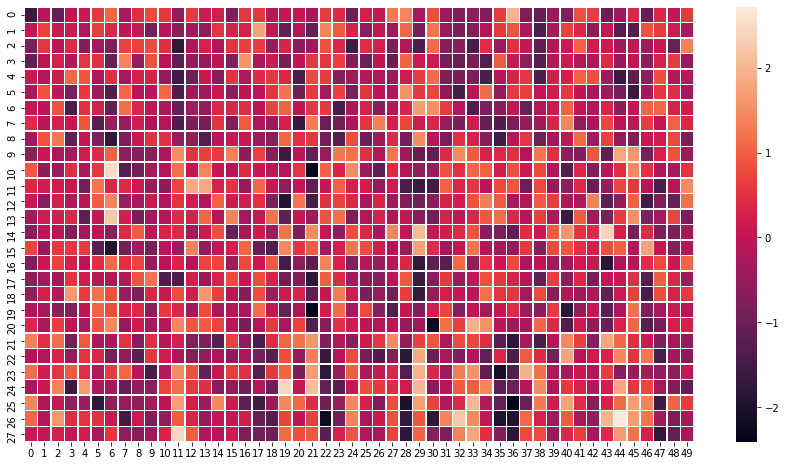

In [67]:
plot_heatmap(Word2Vec(sentences, size = 50, window=4))

PCA

In [0]:
def plot_pca(model):
  X = model.wv[model.wv.vocab]
  pca_model = PCA(n_components=2)
  result = pca_model.fit_transform(X)

  plt.figure(figsize=(15,8))
  plt.scatter(result[:,0], result[:,1])
  words = list(model.wv.vocab)
  for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

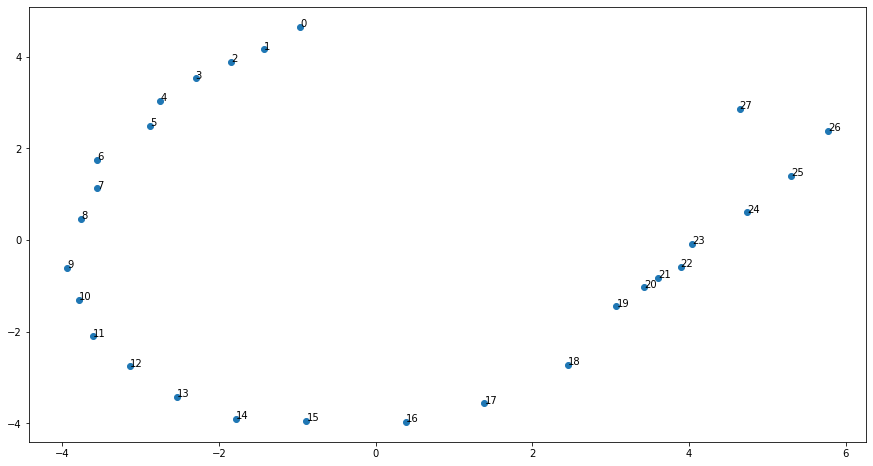

In [69]:
plot_pca(Word2Vec(sentences, size =300, window =10 ))

# Most similar

In [0]:
model = Word2Vec(sentences, size =300, window=5)

In [77]:
model.wv.most_similar('10', topn=3)

[('8', 0.40089863538742065),
 ('11', 0.3632128834724426),
 ('13', 0.32758235931396484)]

In [78]:
model.wv.most_similar(positive=['10', '8'], negative=['6'], topn=3)

[('12', 0.3333471715450287),
 ('11', 0.3150789141654968),
 ('13', 0.2891678810119629)]